# --- `Day 18`: Snailfish ---

In [1]:
import aocd
import re
import heapq
import operator
from graphviz import Digraph
from collections import Counter, defaultdict, deque
from itertools import combinations
from functools import lru_cache

def prod(iterable):
    return reduce(operator.mul, iterable, 1)

def count(iterable, predicate = bool):
    return sum([1 for item in iterable if predicate(item)])

def first(iterable, default = None):
    return next(iter(iterable), default)

def lmap(func, *iterables):
    return list(map(func, *iterables))

def ints(s):
    return lmap(int, re.findall(r"-?\d+", s))

def words(s):
    return re.findall(r"[a-zA-Z]+", s)

def list_diff(x):
    return [b - a for a, b in zip(x, x[1:])]

def binary_to_int(lst):
    return int("".join(str(i) for i in lst), 2)

def get_column(lst, index):
    return [x[index] for x in lst]

In [2]:
def parse_line(line): 
    return str(line)
    
def parse_input(input):
    return list(map(parse_line, input.splitlines()))

In [ ]:
final_input = parse_input(aocd.get_data(day=18, year=2021))
print(final_input[:5])

In [4]:
test_input = parse_input('''\
[[[0,[5,8]],[[1,7],[9,6]]],[[4,[1,2]],[[1,4],2]]]
[[[5,[2,8]],4],[5,[[9,9],0]]]
[6,[[[6,2],[5,6]],[[7,6],[4,7]]]]
[[[6,[0,7]],[0,9]],[4,[9,[9,0]]]]
[[[7,[6,4]],[3,[1,3]]],[[[5,5],1],9]]
[[6,[[7,3],[3,2]]],[[[3,8],[5,7]],4]]
[[[[5,4],[7,7]],8],[[8,3],8]]
[[9,3],[[9,9],[6,[4,9]]]]
[[2,[[7,7],7]],[[5,8],[[9,3],[0,2]]]]
[[[[5,2],5],[8,[3,7]]],[[5,[7,5]],[4,4]]]
''')

print(test_input)

['[[[0,[5,8]],[[1,7],[9,6]]],[[4,[1,2]],[[1,4],2]]]', '[[[5,[2,8]],4],[5,[[9,9],0]]]', '[6,[[[6,2],[5,6]],[[7,6],[4,7]]]]', '[[[6,[0,7]],[0,9]],[4,[9,[9,0]]]]', '[[[7,[6,4]],[3,[1,3]]],[[[5,5],1],9]]', '[[6,[[7,3],[3,2]]],[[[3,8],[5,7]],4]]', '[[[[5,4],[7,7]],8],[[8,3],8]]', '[[9,3],[[9,9],[6,[4,9]]]]', '[[2,[[7,7],7]],[[5,8],[[9,3],[0,2]]]]', '[[[[5,2],5],[8,[3,7]]],[[5,[7,5]],[4,4]]]']


### Helpers

In [5]:
class TreeNode(object):
    def __init__(self, x):
        self.value = x
        self.left = None
        self.right = None
        self.parent = None
        
def printTree(tree, top = True):
    if tree == None:
        return
    if tree.value != None:
        print(tree.value, end="")
    else:
        print("[", end="")
        printTree(tree.left, False)
        print(",", end="")
        printTree(tree.right, False)
        print("]", end="")
    if top:
        print("")
        
root = TreeNode(None)
c1 = TreeNode(None)
c1.left = TreeNode(1)
c1.right = TreeNode(2)
c2 = TreeNode(3)
root.left = c1
root.right = c2
printTree(root)

[[1,2],3]


In [6]:
def parse(line):
    stack = []
    lastDigit = False
    for c in line:
        if c == '[':
            stack.append('[')
            lastDigit = False
        elif c == ']':
            a = stack.pop()
            b = stack.pop()
            stack.pop() # left bracket
            t = TreeNode(None)
            t.left = b
            t.right = a
            a.parent = t
            b.parent = t
            stack.append(t)
            lastDigit = False
        elif c == ",":
            lastDigit = False
        else:
            if lastDigit:
                stack[-1].value *= 10
                stack[-1].value += int(c)
            else:
                stack.append(TreeNode(int(c)))
            lastDigit = True
            
    return stack[0]

printTree(parse("[1,2]"))
printTree(parse("[[1,2],3]"))
printTree(parse("[[[[1,2],[3,4]],[[5,6],[7,8]]],9]"))
printTree(parse("[[[[5,0],[7,4]],[5,5]],[6,6]]"))
printTree(parse("[[[[5,0],[7,4]],[5,10]],[16,6]]"))

[1,2]
[[1,2],3]
[[[[1,2],[3,4]],[[5,6],[7,8]]],9]
[[[[5,0],[7,4]],[5,5]],[6,6]]
[[[[5,0],[7,4]],[5,10]],[16,6]]


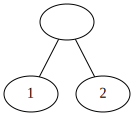

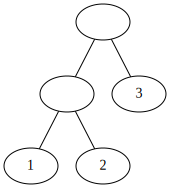

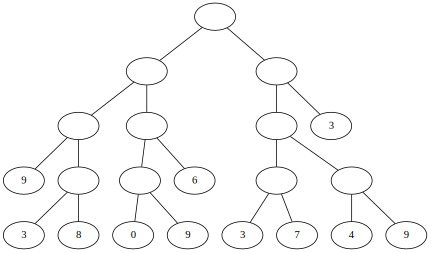

In [7]:
def displayTree(root):
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph(graph_attr = {'size':"6,6"}, edge_attr = {'dir':'none'})
            dot.node(name=str(tree), label=str(tree.value) if tree.value != None else "")

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.value) if tree.left.value != None else "")
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.value) if tree.right.value != None else "")
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    dot = add_nodes_edges(root)
    display(dot)

displayTree(parse("[1,2]"))
displayTree(parse("[[1,2],3]"))
displayTree(parse("[[[9,[3,8]],[[0,9],6]],[[[3,7],[4,9]],3]]"))

[[1,2],[[3,4],5]]


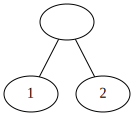

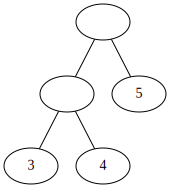

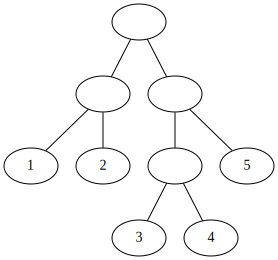

In [8]:
def add(a, b):
    root = TreeNode(None)
    root.left = a
    root.right = b
    a.parent = root
    b.parent = root
    return root

aa = parse("[1,2]")
bb = parse("[[3,4],5]")
added = add(aa, bb)

printTree(added)
displayTree(aa)
displayTree(bb)
displayTree(added)

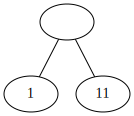

True


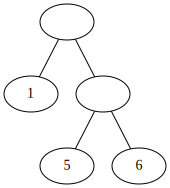

In [9]:
def split(tree):
    if not tree:
        return False
    if tree.value and tree.value >= 10:
        tree.left = TreeNode(tree.value // 2)
        tree.right = TreeNode((tree.value + 1) // 2)
        tree.value = None
        tree.left.parent = tree
        tree.right.parent = tree
        return True
    if split(tree.left):
        return True
    if split(tree.right):
        return True
    return False

t = TreeNode(None)
t.left = TreeNode(1)
t.right = TreeNode(11)
displayTree(t)
print(split(t))
displayTree(t)

In [10]:
def magnitude(tree):
    if tree.value != None:
        return tree.value
    return 3 * magnitude(tree.left) + 2 * magnitude(tree.right)

print(magnitude(parse("[9,1]")))
print(magnitude(parse("[[[[5,0],[7,4]],[5,5]],[6,6]]")))

29
1137


[[[[[9,8],1],2],3],4]


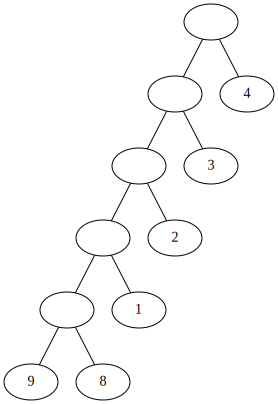

True
[[[[0,9],2],3],4]


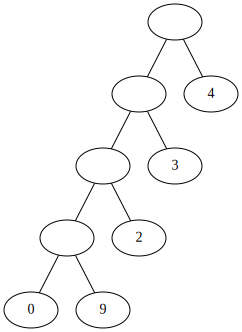

In [11]:
def findRight(tree, child):
    if tree == None:
        return None
    if tree.right != child:
        return tree.right
    return findRight(tree.parent, tree)

def findLeft(tree, child):
    if tree == None:
        return None
    if tree.left != child:
        return tree.left
    return findLeft(tree.parent, tree)
    
def addRight(tree, value):
    if tree.value == None:
        addRight(tree.left, value)
    else:
        tree.value += value
    return

def addLeft(tree, value):
    if tree.value == None:
        addLeft(tree.right, value)
    else:
        tree.value += value
    return

def explode(tree, level = 0):
    if tree == None:
        return False
    if level == 4 and tree.value == None:
        tree.value = 0
        rightValue = tree.right.value
        leftValue = tree.left.value
        
        tree.left = None
        tree.right = None
        right = findRight(tree.parent, tree)
        if right != None:
            addRight(right, rightValue)
            
        left = findLeft(tree.parent, tree)
        if left != None:
            addLeft(left, leftValue)
        return True
    if explode(tree.left, level + 1):
        return True
    if explode(tree.right, level + 1):
        return True
    return False

root = parse("[[[[[9,8],1],2],3],4]")
printTree(root)
displayTree(root)

print(explode(root))

printTree(root)
displayTree(root)

[7,[6,[5,[4,[3,2]]]]]


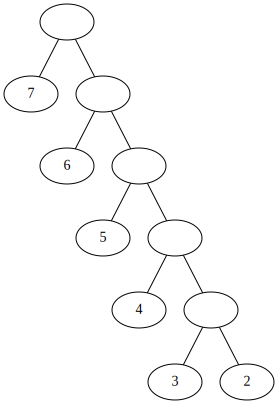

True
[7,[6,[5,[7,0]]]]


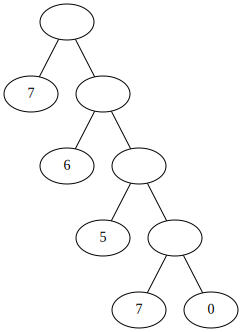

In [12]:
root = parse("[7,[6,[5,[4,[3,2]]]]]")
printTree(root)
displayTree(root)

print(explode(root))

printTree(root)
displayTree(root)

[[6,[5,[4,[3,2]]]],1]


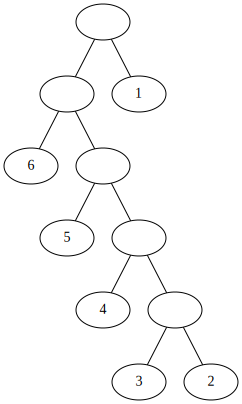

True
[[6,[5,[7,0]]],3]


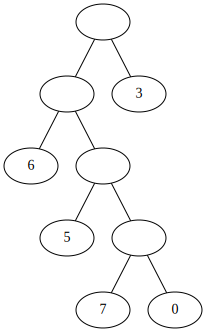

In [13]:
root = parse("[[6,[5,[4,[3,2]]]],1]")
printTree(root)
displayTree(root)

print(explode(root))

printTree(root)
displayTree(root)

[[3,[2,[1,[7,3]]]],[6,[5,[4,[3,2]]]]]


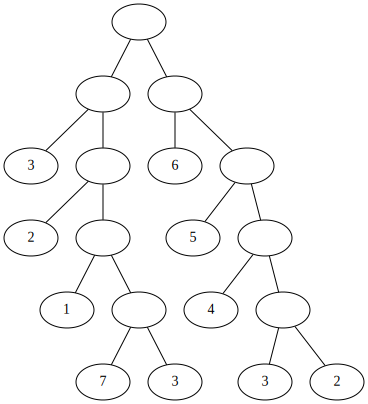

True
[[3,[2,[8,0]]],[9,[5,[4,[3,2]]]]]


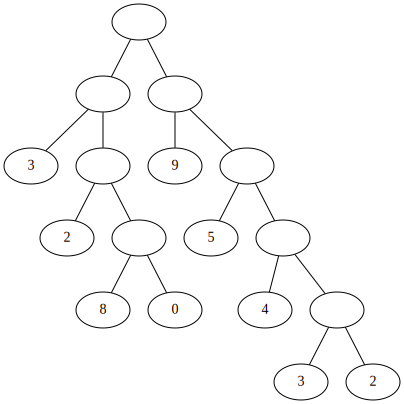

In [14]:
root = parse("[[3,[2,[1,[7,3]]]],[6,[5,[4,[3,2]]]]]")
printTree(root)
displayTree(root)

print(explode(root))

printTree(root)
displayTree(root)

[[3,[2,[8,0]]],[9,[5,[4,[3,2]]]]]


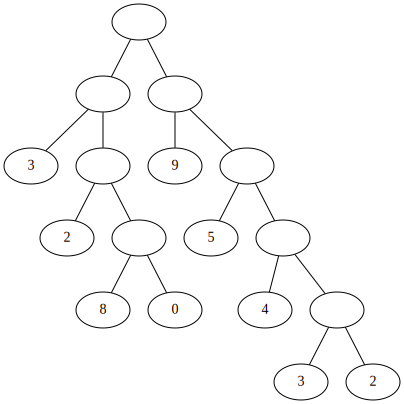

True
[[3,[2,[8,0]]],[9,[5,[7,0]]]]


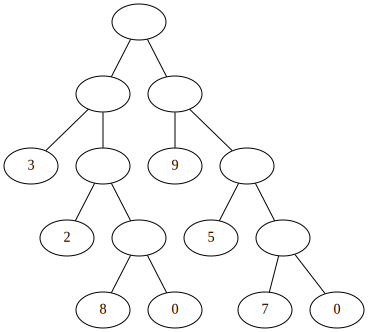

In [15]:
root = parse("[[3,[2,[8,0]]],[9,[5,[4,[3,2]]]]]")
printTree(root)
displayTree(root)

print(explode(root))

printTree(root)
displayTree(root)

[[[[4,0],[5,4]],[[7,7],[0,[6,7]]]],[10,[[11,9],[11,0]]]]


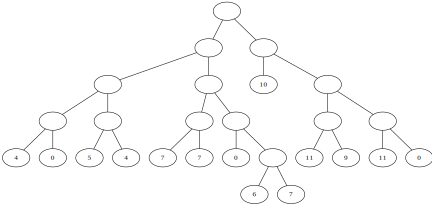

True
[[[[4,0],[5,4]],[[7,7],[6,0]]],[17,[[11,9],[11,0]]]]


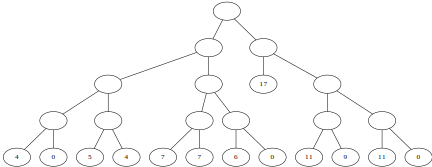

In [16]:
root = parse("[[[[4,0],[5,4]],[[7,7],[0,[6,7]]]],[10,[[11,9],[11,0]]]]")
printTree(root)
displayTree(root)

print(explode(root))

printTree(root)
displayTree(root)

In [17]:
def reduce(root):
    def reduceHelper(tree):
        if explode(tree):
            #print("explode")
            #printTree(tree)
            return True
        else:
            if split(tree):
                #print("split")
                #printTree(tree)
                return True
        return False
        
    while reduceHelper(root):
        pass
    return

aa = parse("[[[[4,0],[5,4]],[[7,7],[6,0]]],[[8,[7,7]],[[7,9],[5,0]]]]")
bb = parse("[[2,[[0,8],[3,4]]],[[[6,7],1],[7,[1,6]]]]")
cc = add(aa, bb)
reduce(cc)
printTree(cc)

[[[[6,7],[6,7]],[[7,7],[0,7]]],[[[8,7],[7,7]],[[8,8],[8,0]]]]


## Solution 1

In [18]:
def solve_1(input):
    result = None
    for line in input:
        a = parse(line)
        if result == None:
            result = a
            continue
        result = add(result, a)
        reduce(result)
    return magnitude(result)

solve_1(test_input)

4140

In [ ]:
f"Solution 1: {solve_1(final_input)}"

## Solution 2

In [20]:
def solve_2(input):
    count = 0
    for i,l1 in enumerate(input):
        for j,l2 in enumerate(input):
            a = parse(l1)
            b = parse(l2)
            
            if i != j:
                result = add(a, b)
                reduce(result)
                value = magnitude(result)
                if value > count:
                    count = value
    return count
    
solve_2(test_input)

3993

In [ ]:
f"Solution 2: {solve_2(final_input)}"